In [11]:
import nibabel as nib
import numpy as np
import os
import time
import sys
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants

In [ ]:
### Overview:
# func -> anat
    # anat is first resampled to (256,128,49)
# anat -> FDA
    # both are resampled to (256,128,49)
# rawdata -> FDA

In [4]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine.nii"
meanbrain = np.asarray(nib.load(file).get_data().squeeze(), dtype='float32')

In [5]:
meanbrain.shape

(1652, 768, 479)

In [6]:
meanbrain_flip = meanbrain[:,:,::-1]

In [19]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine_zflip.nii"

In [8]:
nib.Nifti1Image(meanbrain_flip, np.eye(4)).to_filename(save_file)

In [20]:
fixed = np.asarray(nib.load(save_file).get_data().squeeze(), dtype='float32')
fixed = ants.from_numpy(fixed)
fixed.set_spacing((.38,.38,.38))
print('here')
fixed = ants.resample_image(fixed,(256,128,49),1,0)

here


In [17]:
fixed

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 128, 49)
	 Spacing    : (2.4603, 2.295, 3.7842)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [21]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine_zflip_downsample.nii"

In [22]:
nib.Nifti1Image(fixed.numpy(), np.eye(4)).to_filename(save_file)

In [12]:
(1652/256)*.38

2.4521875

In [29]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_143/func_0/functional_channel_2_moco_zscore_highpass.nii"

In [30]:
brain = np.asarray(nib.load(file).get_data().squeeze(), dtype='float32')

In [31]:
brain.shape

(256, 128, 49, 3384)

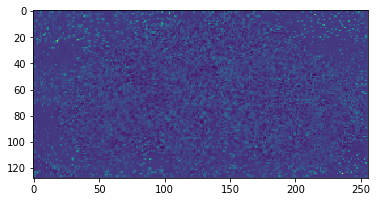

In [32]:
plt.imshow(brain[:,:,20,100].T)

In [34]:
fixed_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine_zflip.nii"
fixed_resolution = (0.653, 0.653, 1) # wrong

moving_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_143/func_0/functional_channel_2_moco_zscore_highpass.nii"
moving_resolution = (2.611, 2.611, 5, 1)

warp_directory = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_143/warp"

###################
### Load Brains ###
###################
fixed = np.asarray(nib.load(fixed_path).get_data().squeeze(), dtype='float32')
fixed = ants.from_numpy(fixed)
fixed.set_spacing(fixed_resolution)
fixed = ants.resample_image(fixed,(256,128,49),1,0)
print('fixed ready')

moving = np.asarray(nib.load(moving_path).get_data().squeeze(), dtype='float32')
moving = moving[...,:5]
moving = ants.from_numpy(moving)
moving.set_spacing(moving_resolution)
print('moving ready')

###########################
### Organize Transforms ###
###########################
affine_file = os.listdir(os.path.join(warp_directory, 'func-to-anat_fwdtransforms_lowres'))[0]
affine_path = os.path.join(warp_directory, 'func-to-anat_fwdtransforms_lowres', affine_file)

syn_files = os.listdir(os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_lowres'))
syn_linear_path = os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_lowres', [x for x in syn_files if '.mat' in x][0])
syn_nonlinear_path = os.path.join(warp_directory, 'anat-to-meanbrain_fwdtransforms_lowres', [x for x in syn_files if '.nii.gz' in x][0])

transforms = [affine_path, syn_linear_path, syn_nonlinear_path]

########################
### Apply Transforms ###
########################
print('warping')
moco = ants.apply_transforms(fixed, moving, transforms, imagetype=3)

fixed ready
moving ready
warping


In [41]:
fixed_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/anat_templates/20220301_luke_2_jfrc_affine_zflip.nii"
fixed = np.asarray(nib.load(fixed_path).get_data().squeeze(), dtype='float32')
fixed.shape

(1652, 768, 479)

In [40]:
fixed

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 128, 49)
	 Spacing    : (4.2279, 3.9437, 9.9583)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [37]:
transforms = [affine_path]

########################
### Apply Transforms ###
########################
print('warping')
moco = ants.apply_transforms(fixed, moving, transforms, imagetype=3)

warping


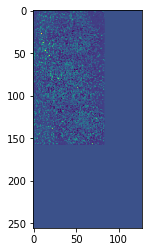

In [38]:
plt.imshow(moco.numpy()[:,:,20,-1])

In [39]:
fixed

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 128, 49)
	 Spacing    : (4.2279, 3.9437, 9.9583)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]